In [93]:
import numpy as np
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In previous notebook, we managed to solve the value function for the random policy by solving a linear system. This notebook is to solve the gridworld problem using Policy Evaluation in Dynamic Programming. We will look at how fast the approximation will approach the real answer and what are the factors that could potentially accelerate the approximation. 

Bellman Equation:

$$ V^{\pi}(s) = \sum_{a} \pi(s,a) \sum_{s^\prime} P_{s{s^\prime}}^{a} 
   (R_{s{s^\prime}}^{a} + \gamma V^{\pi}(s^\prime)) $$
   
   
Iterative Policy Evaluation:  
   
$$ V_{k+1}(s) = \sum_{a} \pi(s,a) \sum_{s^\prime} P_{s{s^\prime}}^{a} 
   (R_{s{s^\prime}}^{a} + \gamma V_{k}(s^\prime)) $$

Here we stick to the random walk policy where the agent has an equal probability of going to each of the four direction (E, S, W, N). So in that case $\pi(s, a)$ is always $\frac{1}{4}$, even at the teleport point. 

We need to initialize $V(s)$ for all the possible states, 25 cells in this case, and let's use a list of lenght 25 to keep the latest value of V for round k. 

In [89]:
size = 5
# initialize the state value function to be all zeros
v = [0 for _ in range(size*size)]
print(v)

P = {'E': 0.25, 'S': 0.25, 'W': 0.25, 'N': 0.25}

num_iterations = 50
epsilon = 0.05
gamma = 0.9
# this is a list to store the distance between V_k and V_k+1
distance = []

for idx in range(num_iterations):
    delta = 0
    v_new = [0 for _ in range(size*size)]

    for x in range(size):
        for y in range(size): 
            
            s = x*size + y
            
            ####################################################
            ###  use the old value to calculate the new value  #
            ####################################################
            
            # the two teleport points: S=[1,0] -> [1,4], S=[3,0] -> [3,3]
            if s == 5:
                s_a_prime = 1 * size + 4
                v_new[s] = 10 + gamma * v[s_a_prime]
                continue
            elif s == 15:
                s_b_prime = 3 * size + 3
                v_new[s] = 5 + gamma * v[s_b_prime]
                continue
                
            v_sum = 0
            
            # E: x+1, y
            r = 0
            x_ = x+1
            y_ = y 
            if x_ > size - 1:
                x_ = x
                r = -1 
            v_sum += P['E']*(r + gamma * v[size*x_+y_])
            
            # S: x, y+1
            r = 0
            x_ = x
            y_ = y+1 
            if y_ > size - 1:
                y_ = y
                r = -1
            v_sum += P['S']*(r + gamma * v[size*x_+y_])

            # W: x-1, y
            r = 0
            x_ = x-1
            y_ = y 
            if x_ < 0:
                x_ = x
                r = -1
            v_sum += P['W']*(r + gamma * v[size*x_+y_])

            # N: x, y-1
            r = 0
            x_ = x
            y_ = y-1 
            if y_ < 0:
                y_ = y
                r = -1
            v_sum += P['N']*(r + gamma * v[size*x_+y_])
            v_new[s] = v_sum

    distance.append([idx, np.linalg.norm(np.array(v_new) - np.array(v))])
    np.set_printoptions(precision=3, suppress=True)
    v_print = np.asmatrix([v_new[i:i+size] for i in range(0, len(v_new), size)])
    print('>'*50)
    print('Iteration Num: ', idx)
    print(v_print)

    if np.allclose(v, v_new, rtol=epsilon):
        print('close enough')
        break
        
    v = v_new.copy()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Iteration Num:  0
[[ -0.5   -0.25  -0.25  -0.25  -0.5 ]
 [ 10.     0.     0.     0.    -0.25]
 [ -0.25   0.     0.     0.    -0.25]
 [  5.     0.     0.     0.    -0.25]
 [ -0.5   -0.25  -0.25  -0.25  -0.5 ]]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Iteration Num:  1
[[ 1.469 -0.475 -0.419 -0.475 -0.838]
 [ 9.775  2.194 -0.056 -0.113 -0.475]
 [ 3.069 -0.056  0.    -0.056 -0.419]
 [ 5.     1.069 -0.056 -0.113 -0.475]
 [ 0.344 -0.475 -0.419 -0.475 -0.838]]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Iteration Num:  2
[[ 2.253  0.373 -0.571 -0.665 -1.091]
 [ 9.572  2.067  0.374 -0.239 -0.665]
 [ 3.752  1.425 -0.051 -0.145 -0.571]
 [ 4.899  0.993  0.121 -0.239 -0.665]
 [ 0.673 -0.133 -0.571 -0.665 -1.091]]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Iteration Num:  3
[[ 2.752  0.678 -0.36  -0.827 -1.29 ]
 [ 9.402  2.642  0.272 -0.248 -0.827]

In [90]:
res = np.array(v)
res.shape = (size, size)
print(res.transpose())

[[ 3.342  8.86   4.189  4.497  1.076]
 [ 1.522  2.984  2.12   1.638  0.324]
 [ 0.055  0.728  0.641  0.273 -0.475]
 [-0.945 -0.401 -0.335 -0.561 -1.163]
 [-1.801 -1.287 -1.162 -1.355 -1.901]]


The above approximation using policy evaluation is pretty close to the one solving the linear system directly

In [91]:
v_solver = [[ 3.282,  8.762,  4.097,  4.403,  0.998],
 [ 1.483,  2.922,  2.058,  1.558,  0.258],
 [ 0.015,  0.682,  0.569,  0.204, -0.556],
 [-1.002, -0.475, -0.414, -0.663, -1.266],
 [-1.882, -1.375, -1.27,  -1.473, -2.029]]
print(np.array(v_solver))

[[ 3.282  8.762  4.097  4.403  0.998]
 [ 1.483  2.922  2.058  1.558  0.258]
 [ 0.015  0.682  0.569  0.204 -0.556]
 [-1.002 -0.475 -0.414 -0.663 -1.266]
 [-1.882 -1.375 -1.27  -1.473 -2.029]]


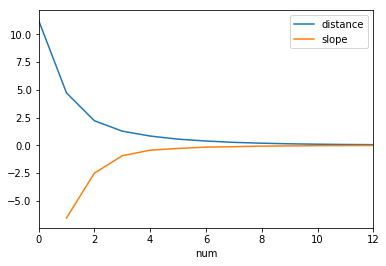

In [99]:
df_distance = pd.DataFrame(distance, columns=['num', 'distance'])
df_distance['slope'] = df_distance['distance'] - df_distance['distance'].shift(1)
df_distance.plot(x='num', y=['distance', 'slope'])

My observation is that the approximation actually works really well, after only a few iterations, the value will stay fairly stable and the computation is not intensive at all. 